In [102]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

"Serão utilizadas na clusterização 3 variáveis (Preço médio - Renda - e Vr do FGTS)"

In [103]:
tenda = pd.read_csv('base.segmentacao.tenda.csv',sep=';',decimal = ',')

In [104]:
tenda.dtypes

Chave unica                       object
data_da_venda                     object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [105]:
tenda.head()

,Chave unica,data_da_venda,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO168923N6K9S2200046,01/01/2017,156700.0,2250.0,0.0
1,PRO169451T5N0Q1117181,01/01/2017,130980.0,2250.0,0.0
2,PRO17071400035345011,01/01/2017,150336.7,5207.9,23286.8
3,PRO17071800383346255,01/01/2017,145000.0,2130.8,0.0
4,PRO17071800387345493,01/01/2017,117000.0,1973.2,0.0


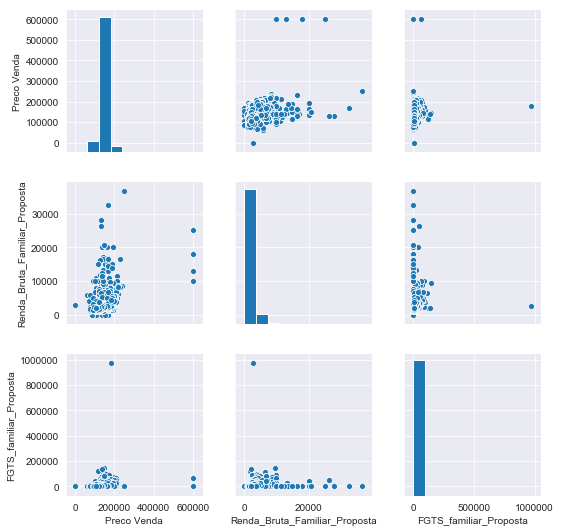

In [106]:
sb.pairplot(tenda)

In [115]:
tenda_drop = tenda.drop(['Chave unica','data_da_venda' ],axis = 1)
tenda_drop

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,156700.0,2250.0,0.0
1,130980.0,2250.0,0.0
2,150336.7,5207.9,23286.8
3,145000.0,2130.8,0.0
4,117000.0,1973.2,0.0
5,125000.0,1491.0,7794.8
6,123375.2,4134.5,0.0
7,126927.9,1919.4,11600.0
8,130000.0,3257.7,15998.1
9,135768.0,2656.1,11035.3


In [116]:
tenda_drop

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,156700.0,2250.0,0.0
1,130980.0,2250.0,0.0
2,150336.7,5207.9,23286.8
3,145000.0,2130.8,0.0
4,117000.0,1973.2,0.0
5,125000.0,1491.0,7794.8
6,123375.2,4134.5,0.0
7,126927.9,1919.4,11600.0
8,130000.0,3257.7,15998.1
9,135768.0,2656.1,11035.3


K-MEANS

In [110]:
from sklearn.cluster import KMeans

In [117]:
sb.set_style('darkgrid')

In [118]:
wcss = []

1 12851933007302.219
2 6278730813372.721
3 4689048251047.658
4 4107789441772.707
5 3380454058366.5205
6 3293488556007.9883
7 3063891325611.1157
8 2386154655287.6694
9 2048443792856.025


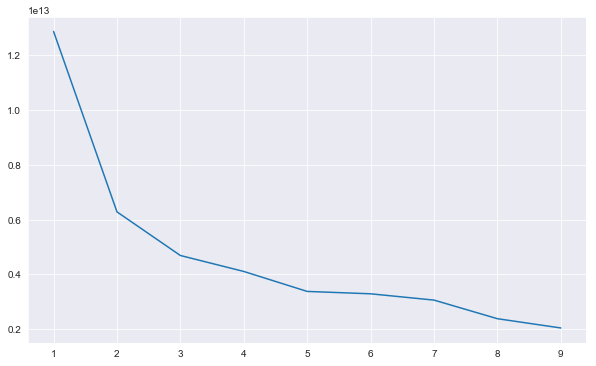

In [119]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [120]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [123]:
kmeans.fit(tenda_drop)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [124]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0])

CLASSES CRIADAS

In [125]:
tenda['Kclasses'] = kmeans.labels_

In [126]:
tenda. head(20)

,Chave unica,data_da_venda,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO168923N6K9S2200046,01/01/2017,156700.0,2250.0,0.0,1
1,PRO169451T5N0Q1117181,01/01/2017,130980.0,2250.0,0.0,0
2,PRO17071400035345011,01/01/2017,150336.7,5207.9,23286.8,1
3,PRO17071800383346255,01/01/2017,145000.0,2130.8,0.0,1
4,PRO17071800387345493,01/01/2017,117000.0,1973.2,0.0,0
5,PRO17072000780346053,01/01/2017,125000.0,1491.0,7794.8,0
6,PRO17072401487346421,01/01/2017,123375.2,4134.5,0.0,0
7,PRO17072802303346631,01/01/2017,126927.9,1919.4,11600.0,0
8,PRO17072902329346627,01/01/2017,130000.0,3257.7,15998.1,0
9,PRO17080102679345645,01/01/2017,135768.0,2656.1,11035.3,0


In [127]:
tenda['Kclasses'] = kmeans.labels_

In [128]:
tenda.Kclasses.value_counts()

0    15553
1     8064
2     3581
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [167]:
tenda.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses,Year,Month
count,27198.00,27198.00,27198.00,27198.00,27198.00,27198.0
mean,139576.44,2282.11,6600.47,0.56,2017.67,1.0
std,19449.33,1077.50,9649.46,0.71,0.62,0.0
min,0.00,0.00,0.00,0.00,2017.00,1.0
25%,127879.22,1706.70,1132.42,0.00,2017.00,1.0
50%,134500.00,2011.00,4612.90,0.00,2018.00,1.0
75%,147348.47,2506.83,9186.17,1.00,2018.00,1.0
max,600000.00,36698.90,973801.00,2.00,2019.00,1.0


In [166]:
tenda.groupby('Kclasses')['Preco Venda'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Kclasses,,,,,,,,
0,15553.0,126778.50,7162.44,0.0,122016.0,128000.0,132716.5,138194.3
1,8064.0,147989.29,6531.14,130100.0,144000.0,145827.0,153000.0,164162.5
2,3581.0,176215.71,18466.68,138637.4,166479.8,172602.0,182381.2,600000.0


In [165]:
tenda.groupby('Kclasses')['Renda_Bruta_Familiar_Proposta'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Kclasses,,,,,,,,
0,15553.0,1948.82,717.36,0.0,1600.00,1825.2,2101.00,28000.0
1,8064.0,2430.00,1024.27,0.0,1893.25,2224.9,2636.35,20677.7
2,3581.0,3396.61,1564.42,0.0,2566.80,3057.5,3795.40,36698.9


In [164]:
tenda.groupby('Kclasses')['FGTS_familiar_Proposta'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Kclasses,,,,,,,,
0,15553.0,4549.7,5088.06,0.0,379.9,3332.1,6820.0,120547.1
1,8064.0,7610.5,7567.49,0.0,2095.6,6001.0,10895.5,116678.9
2,3581.0,13232.9,20033.82,0.0,4758.9,10256.0,17904.4,973801.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


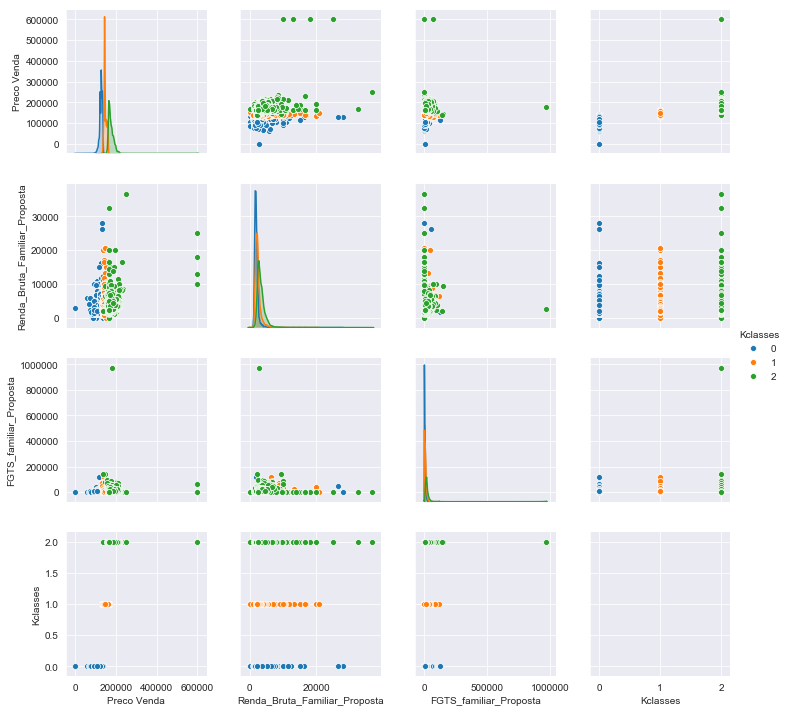

In [132]:
sb.pairplot(tenda,hue='Kclasses')

In [363]:
tenda.to_csv('clustertenda.csv',sep=';',decimal=',')

In [144]:
tenda['Year'] = pd.DatetimeIndex(tenda['data_da_venda']).year

In [162]:
tenda_final = tenda.drop (('Month'),axis = 1) 
tenda_final.head(20)

,Chave unica,data_da_venda,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses,Year
0,PRO168923N6K9S2200046,01/01/2017,156700.0,2250.0,0.0,1,2017
1,PRO169451T5N0Q1117181,01/01/2017,130980.0,2250.0,0.0,0,2017
2,PRO17071400035345011,01/01/2017,150336.7,5207.9,23286.8,1,2017
3,PRO17071800383346255,01/01/2017,145000.0,2130.8,0.0,1,2017
4,PRO17071800387345493,01/01/2017,117000.0,1973.2,0.0,0,2017
5,PRO17072000780346053,01/01/2017,125000.0,1491.0,7794.8,0,2017
6,PRO17072401487346421,01/01/2017,123375.2,4134.5,0.0,0,2017
7,PRO17072802303346631,01/01/2017,126927.9,1919.4,11600.0,0,2017
8,PRO17072902329346627,01/01/2017,130000.0,3257.7,15998.1,0,2017
9,PRO17080102679345645,01/01/2017,135768.0,2656.1,11035.3,0,2017


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


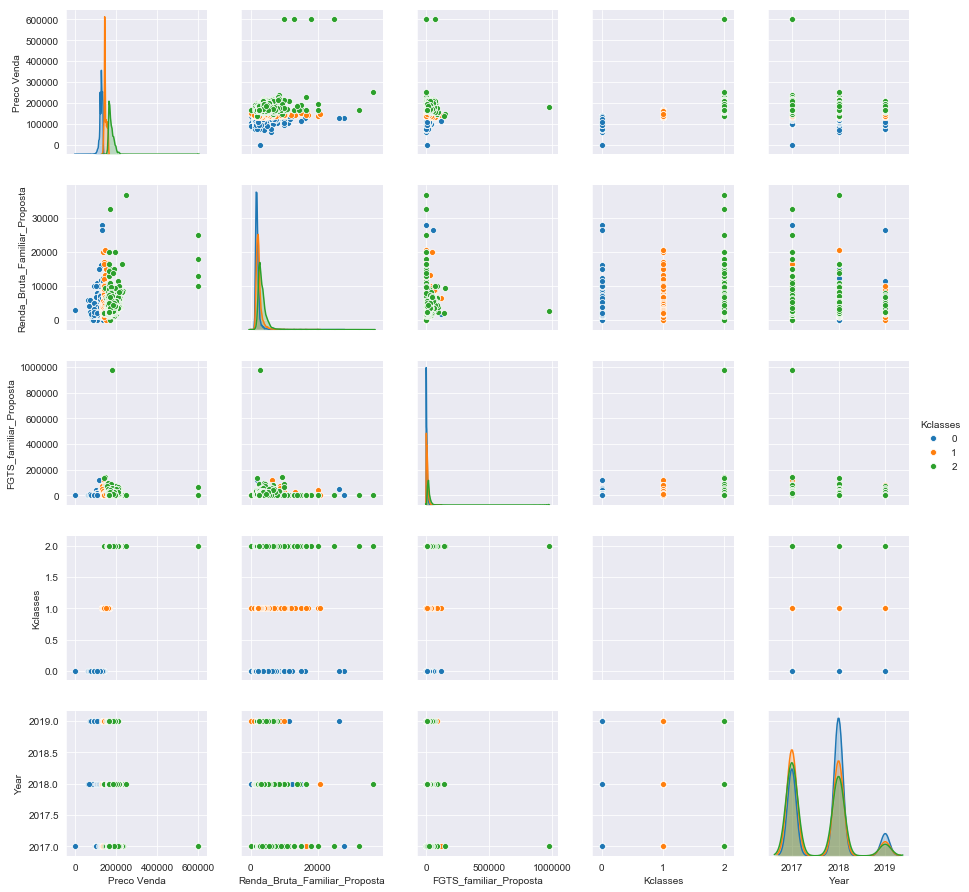

In [163]:
sb.pairplot(tenda_final,hue='Kclasses')

PERFIL DOS CLUSTER'S POR ANO

In [160]:
tenda_final.groupby(['Year', 'Kclasses']).mean().round(2)

Preco Venda  Renda_Bruta_Familiar_Proposta  \
Year Kclasses                                               
2017 0           127156.99                        2044.76   
     1           148016.88                        2443.21   
     2           176411.66                        3372.18   
2018 0           127278.56                        1884.34   
     1           147998.18                        2391.80   
     2           176070.56                        3413.96   
2019 0           122181.95                        1976.43   
     1           147721.64                        2588.18   
     2           175631.71                        3474.61   

               FGTS_familiar_Proposta  
Year Kclasses                          
2017 0                        4480.79  
     1                        6936.09  
     2                       12455.47  
2018 0                        4595.49  
     1                        8086.88  
     2                       13926.57  
2019 0                        4533.06  
     1                        9474.83  
     2                       14737.17

In [161]:
tenda_final.groupby(['Year', 'Kclasses']).describe().round(2)

FGTS_familiar_Proposta                                    \
                               count      mean       std  min      25%   
Year Kclasses                                                            
2017 0                        5450.0   4480.79   5204.57  0.0     0.00   
     1                        3975.0   6936.09   7148.81  0.0  1761.10   
     2                        1812.0  12455.47  25140.35  0.0  4484.98   
2018 0                        8707.0   4595.49   5032.81  0.0   497.25   
     1                        3561.0   8086.88   7768.46  0.0  2251.70   
     2                        1545.0  13926.57  12670.93  0.0  5139.60   
2019 0                        1396.0   4533.06   4969.78  0.0   776.98   
     1                         528.0   9474.83   8641.71  0.0  3382.92   
     2                         224.0  14737.17  13721.98  0.0  4872.30   

                                            Preco Venda              ...     \
                    50%       75%       max       count       mean   ...      
Year Kclasses                                                        ...      
2017 0          3301.80   6804.10  120547.1      5450.0  127156.99   ...      
     1          5443.10   9912.15  116678.9      3975.0  148016.88   ...      
     2          9565.30  16559.10  973801.0      1812.0  176411.66   ...      
2018 0          3366.20   6874.25   61000.0      8707.0  127278.56   ...      
     1          6499.70  11533.90   80000.0      3561.0  147998.18   ...      
     2         10963.70  19305.30  138514.4      1545.0  176070.56   ...      
2019 0          3280.55   6581.92   49900.0      1396.0  122181.95   ...      
     1          7581.50  12908.42   83723.6       528.0  147721.64   ...      
     2         10335.60  20837.52   70391.0       224.0  175631.71   ...      

                                   Renda_Bruta_Familiar_Proposta           \
                     75%       max                         count     mean   
Year Kclasses                                                               
2017 0         132204.42  138194.3                        5450.0  2044.76   
     1         152438.90  164103.6                        3975.0  2443.21   
     2         181937.35  600000.0                        1812.0  3372.18   
2018 0         133000.00  138169.8                        8707.0  1884.34   
     1         153000.00  164162.5                        3561.0  2391.80   
     2         182943.20  250000.0                        1545.0  3413.96   
2019 0         130084.00  137831.3                        1396.0  1976.43   
     1         154557.82  163824.7                         528.0  2588.18   
     2         181398.55  208295.1                         224.0  3474.61   

                                                                    
                   std     min      25%      50%      75%      max  
Year Kclasses                                                       
2017 0          784.97     1.1  1670.78  1900.00  2190.80  28000.0  
     1         1106.62     0.0  1869.45  2206.20  2641.55  20000.0  
     2         1650.31     0.0  2531.38  3006.50  3754.18  32430.4  
2018 0          602.73     0.0  1570.20  1781.10  2050.10  16264.6  
     1          947.78  1000.0  1892.10  2213.60  2591.30  20677.7  
     2         1526.02  1295.6  2585.50  3085.10  3816.40  36698.9  
2019 0         1000.15  1063.6  1566.83  1799.55  2101.55  26391.4  
     1          844.05     1.0  2127.90  2429.85  2836.08  10000.0  
     2         1017.56  1975.4  2713.90  3256.25  3899.80   7955.9  

[9 rows x 24 columns]